<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.401 · Fonaments de Programació</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fonaments de Programació
============================

---

Unitat 4: Llibreries científiques en Python - pandas
-----------------------------------------------------

---

### Instruccions d'ús

Aquest document és un *notebook* interactiu que intercala explicacions més aviat teòriques de conceptes de programació amb fragments de codi executables. Per aprofitar els avantatges que aporta aquest format, us recomanem que, en primer lloc, llegiu les explicacions i el codi que us proporcionem. D'aquesta manera tindreu un primer contacte amb els conceptes que hi exposem. Ara bé, **la lectura és només el principi!** Una vegada hàgiu llegit el contingut, no oblideu executar el codi proporcionat i modificar-lo per crear-ne variants que us permetin comprovar que heu entès la seva funcionalitat i explorar-ne els detalls d'implementació. Per últim, us recomanem també consultar la documentació enllaçada per explorar amb més profunditat les funcionalitats dels mòduls presentats.



Per guardar possibles modificacions que feu sobre aquest notebook, us aconsellem que munteu la unitat de Drive a Google Colaboratory (colab). Heu d'executar les instruccions següents:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/prog_datasci_4


### Introducció

A continuació es presentaran explicacions i exemples d'ús de la
llibreria pandas. Recordeu que podeu anar executant els exemples per
obtenir-ne els resultats.

A continuació s'inclou la taula de continguts, que podeu fer servir per navegar pel document:

<ul style="list-style-type:none">
    <li><a href='#1-Introduccio'>1 Introducció</a></li>
    <li><a href="#2-Estructures-de-dades-basiques">2 Estructures de dades bàsiques</a></li>
    <li><a href="#3-Operacions-basiques-sobre-un-dataframe">3 Operacions bàsiques sobre un dataframe</a></li>
    <ul style="list-style-type:none">
        <li><a href="#3.1-Lectura-de-dades-d'un-fitxer">3.1 Lectura de dades d'un fitxer</a></li>
        <li><a href="#3.2-Exploracio-del-dataframe">3.2 Exploració del dataframe</a></li>
        <li><a href="#3.3-Indexacio-i-seleccio-de-dades">3.3 Indexació i selecció de dades</a></li>
        <li><a href="#3.4-Agregacio-de-dades">3.4 Agregació de dades</a></li>
        <li><a href="#3.5-Escriptura-de-dades-a-un-fitxer">3.5 Escriptura de dades a un fitxer</a></li>
    </ul>
    <li><a href="#4-Exercicis-i-preguntes-teoriques">4 Exercicis i preguntes teòriques</a></li>
    <ul style="list-style-type:none">
        <li><a href="#4.1-Instruccions-importants">4.1 Instruccions importants</a></li>
</ul>

<a id='1-Introduccio'></a>
# 1 Introducció

Pandas és una llibreria de Python que ens ofereix una interfície d'alt nivell per manipular i analitzar dades. La llibreria ofereix estructures de dades flexibles sobre les quals carregar-les i implementa operacions sobre aquestes estructures l'ús de les quals resulta molt intuïtiu i que, alhora, són eficients. Per aquest motiu, és una de les eines més utilitzades en l'anàlisi de dades en Python. Pandas també forma part del SciPy stack.

Com veurem més endavant, l'estructura de dades principal de Pandas és el dataframe, una estructura que permet emmagatzemar taules bidimensionals.

Per poder utilitzar la llibreria, en primer lloc cal importar-la:

In [4]:
# A la línia següent, importem pandas i li donem un nom més curt
# perquè ens sigui més còmode fer les crides.
import pandas as pd
# Importem també NumPy, ja que la farem servir en algun dels exemples.
import numpy as np

<a id='2-Estructures-de-dades-basiques'></a>
# 2 Estructures de dades bàsiques

Pandas proveeix de tres estructures de dades: la sèrie, el _dataframe_ i
antigament el panell (ara, els _dataframes_ i les _sèries_ amb índexs multinivell). Vegem les característiques de cadascuna.

Una **sèrie** és un vector **unidimensional** amb **etiquetes** als eixos i
dades **homogènies**.

Repassem què impliquen cadascuna d'aquestes característiques amb uns
exemples.

La sèrie ens permet representar un conjunt de dades unidimensionals,
per exemple, una llista d'enters, decimals o de cadenes de caràcters:

In [5]:
print(pd.Series([1, 1, 2, 3, 5]))

0    1
1    1
2    2
3    3
4    5
dtype: int64


In [6]:
print(pd.Series([1.5, 3.5, 4.75]))

0    1.50
1    3.50
2    4.75
dtype: float64


Les dades d'una sèrie han de ser homogènies, és a dir, han de ser del
mateix tipus. Als exemples anteriors, la primera sèrie estava formada
per enters (int64), mentre que la segona contenia nombres en punt flotant
(float).

De totes maneres, si intentem crear una sèrie amb dades de diferents
tipus, podrem fer-ho, ja que pandas crearà una sèrie amb el tipus més
general:

In [7]:
# Barregem enters i 'floats', la sèrie és de tipus 'float'.
print(pd.Series([1, 2, 3.5]))

0    1.0
1    2.0
2    3.5
dtype: float64


In [8]:
# Barregem enters, 'floats' i 'strings', la sèrie és de tipus 'object'.
print(pd.Series([1, 4.3, "data"]))

0       1
1     4.3
2    data
dtype: object


Finalment, la sèrie pot tenir etiquetes, de manera que podem accedir
als elements d'una sèrie tant a partir del seu índex com de la seva
etiqueta.

In [9]:
# Creem una sèrie etiquetada a partir d'un diccionari.
s = pd.Series({"alice" : 2, "bob": 3, "eve": 5})
print(s)

# Accedim als elements de la sèrie a partir de la seva etiqueta.
print(s["alice"])

# Accedim als elements de la sèrie a partir del seu índex.
print(s[0])

alice    2
bob      3
eve      5
dtype: int64
2
2


In [10]:
# Creem una sèrie etiquetada a partir de dos vectors, un amb les dades i un altre amb les etiquetes.
print(pd.Series([2, 3, 5], index = ["alice", "bob", "eve"]))

alice    2
bob      3
eve      5
dtype: int64


La segona estructura de dades de pandas que presentarem és el _dataframe_.

Un _**dataframe**_ és una taula **bidimensional** amb **etiquetes** als eixos
i dades potencialment **heterogènies**. El _dataframe_ és l' estructura
principal de treball amb la llibreria pandas.

Vegem les característiques principals d'un _dataframe_ amb alguns
exemples.

A diferència d'una sèrie, un _dataframe_ és bidimensional:

In [11]:
print(pd.DataFrame([[1, 2, 3], [4, 5, 6]]))

   0  1  2
0  1  2  3
1  4  5  6


Igual que la sèrie, el _dataframe_ pot tenir etiquetes als eixos i podem
utilitzar diferents sintaxis per incloure les etiquetes al _dataframe_.

In [12]:
# Fem servir un diccionari per definir cada columna i una llista per indicar les etiquetes de les files.
d = {"alice" : [1953, 12, 3], "bob" : [1955, 11, 24], "eve" : [2011, 10, 10]}
print(pd.DataFrame(d, index=["year", "month", "day"]))

       alice   bob   eve
year    1953  1955  2011
month     12    11    10
day        3    24    10


In [13]:
# Fem servir una llista de llistes per a introduir les dades i dues llistes addicionals
# per a indicar les etiquetes de files i les columnes.
a = [[1953, 12, 3], [1955, 11, 24], [2011, 10, 10]]
print(pd.DataFrame(a, columns=["year", "month", "day"], index = ["alice", "bob", "eve"]))

       year  month  day
alice  1953     12    3
bob    1955     11   24
eve    2011     10   10


Cadascuna de les columnes d'un _dataframe_ pot tenir tipus de dades
diferents, donant lloc a _dataframes_ heterogenis:

In [14]:
a = [[1953, "computer science", 3.5], [1955, "archeology", 3.8], [2011, "biology", 2.8]]
print(pd.DataFrame(a, columns=["year", "major", "average grade"], index = ["alice", "bob", "eve"]))

       year             major  average grade
alice  1953  computer science            3.5
bob    1955        archeology            3.8
eve    2011           biology            2.8


En versions anteriors de pandas, disposàvem del panell com a tercera estructura de dades. Un **panell** és una estructura de dades **tridimensional** que pot contenir **etiquetes** als eixos i pot ser **heterogènia**.

Actualment, l'ús dels panells està discontinuat, i fem servir sèries i _dataframes_ amb índexs multinivell per tal de representar estructures de dades de més de dues dimensions.

Vegem un exemple senzill d'ús d'índexs multinivell per a representar una
imatge.

In [15]:
img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]

# Fem servir números per indexar les files i les columnes, i les lletres
# "R", "G", "B" per indicar el contingut d'aquest color en cada píxel
index = pd.MultiIndex.from_product(
    [range(len(img)), range(len(img[0])), ["R", "G", "B"]],
    names=['row', 'column', 'color'])

# Creem la sèrie amb l'índex multidimensional especificant les dades
# i els índex
s = pd.Series([x for row in img for col in row for x in col],
               index=index)
s

row  column  color
0    0       R          0
             G          0
             B          0
     1       R          0
             G         15
             B          0
     2       R          0
             G          0
             B         15
     3       R         15
             G          0
             B          0
     4       R        180
             G        180
             B        180
1    0       R        200
             G        200
             B        200
     1       R        125
             G          1
             B        125
     2       R        100
             G        100
             B          2
     3       R          1
             G        152
             B        125
     4       R         15
             G         25
             B         20
dtype: int64

Visualitzem gràficament la imatge per entendre millor la representació
escollida. La imatge té dues files i cinc columnes i per a cada píxel utilitzem
tres valors numèrics per representar-ne el color.

Populating the interactive namespace from numpy and matplotlib


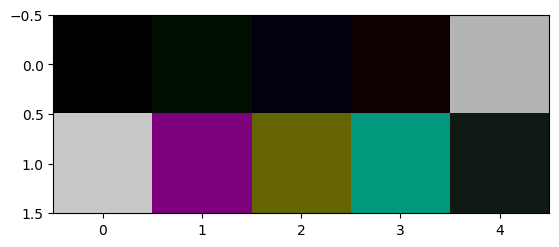

In [16]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype=uint16), interpolation='nearest')

<a id='3-Operacions-basiques-sobre-un-dataframe'></a>
# 3 Operacions bàsiques sobre un _dataframe_

El _dataframe_ és l'estructura més usada a pandas. Vegem algunes de les
operacions que podem realitzar amb aquest.

<a id='3.1-Lexctura-de-dades-fitxer'></a>

## 3.1 Lectura de dades d'un fitxer

Pandas ens permet carregar les dades d'un fitxer CSV directament a un
_dataframe_ a través de la funció `read_csv`. Aquesta funció és molt
versàtil i disposa de multitud de paràmetres per configurar amb tot
detall com dur a terme la importació. En molts casos, la configuració
per defecte ja ens oferirà els resultats desitjats.

Ara carregarem les dades del fitxer `marvel-wikia-data.csv`, que conté
dades sobre personatges de còmic de Marvel. El conjunt de dades va ser
creat pel web [FiveThirtyEight](https://fivethirtyeight.com/), que
escriu articles basats en dades sobre esports i notícies, i que posa a
disposició pública els [conjunts de
dades](https://github.com/fivethirtyeight/data) que recull per als seus
articles.

In [17]:
# Carreguem les dades del fitxer "marvel-wikia-data.csv" a un 'dataframe'.
data = pd.read_csv("data/marvel-wikia-data.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


<a id='3.2-Exploracio-del-dataframe'></a>
## 3.2 Exploració del _dataframe_

Vegem algunes funcions que ens permeten explorar el _dataframe_ que acabem
de carregar.

In [18]:
# Mostrar les 3 primeres files.
data.head(n=3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [19]:
# Mostrar les etiquetes.
data.index

RangeIndex(start=0, stop=16376, step=1)

In [20]:
# Mostra estadístiques bàsiques de les columnes numèriques del 'dataframe'.
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [21]:
# Mostra els tipus de dades i els valors nuls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [22]:
# Calcula la suma d'una columna
data['page_id'].sum()

4916600581

<a id='3.3-Indexacio-i-seleccio-de-dades'></a>
## 3.3 Indexació i selecció de dades

Podem utilitzar les expressions habituals de Python (i NumPy) per
seleccionar dades de _dataframes_ o bé fer servir els operadors propis de
pandas. Aquests últims estan optimitzats, per la qual cosa el seu ús és
recomanat per treballar amb conjunts de dades grans o en situacions en què
l'eficiència sigui crítica.

In [23]:
# Seleccionem els noms dels deu primers personatges, és a dir, mostrem la columna "name" de les deu primeres files
# fent servir expressions Python.
data["name"][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [24]:
# Seleccionem el nom, l'estat de la seva identitat i el color de cabell dels superherois 3 i 8
# amb l'operador d'accés de pandas .loc
data.loc[[3,8], ["name", "ID", "HAIR"]]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [25]:
# Seleccionem files segons el gènere del superheroi utilitzant operadors binaris i expressions Python.
male = data[data.SEX == "Male Characters"]
female = data[data.SEX == "Female Characters"]
print(len(male))
print(len(female))

11638
3837


In [26]:
# Combinem operadors binaris per seleccionar els superherois amb identitat secreta que han aparegut més
# de dues mil vegades amb expressions Python.
secret_and_popular1 = data[(data.APPEARANCES > 1000) & (data.ID == "Secret Identity")]
print(len(secret_and_popular1))
print(secret_and_popular1["name"])

5
0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


In [27]:
# Utilitzem el mètode 'where' de pandas per obtenir la mateixa informació:
secret_and_popular2 = data.where ((data.APPEARANCES> 1000) & (data.ID == "Secret Identity"))
# Fixeu-vos que en aquest cas el resultat té la mateixa mida que el 'dataframe original': els valors no seleccionats
# mostren NaN.
print(len(secret_and_popular2))
print(secret_and_popular2["name"][0:10])

16376
0    Spider-Man (Peter Parker)
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
Name: name, dtype: object


In [28]:
# Podem eliminar les files que tinguin tots els valors NaN, de manera que obtindrem el mateix resultat que fent servir
# operadors binaris.
print(secret_and_popular2.dropna(how="all")["name"])

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


<a id='3.4-Agregacio-de-dades'></a>
## 3.4 Agregació de dades

Pandas també permet crear grups de dades a partir dels valors d' una o
més columnes i després operar sobre els grups creats. Vegem alguns
exemples.

In [29]:
# Agrupem el 'dataframe' en funció de l'alineació del superheroi.
grouped = data.groupby("ALIGN")

# Visualitzem el nom i el nombre de files de cada grup.
for name, group in grouped:
    print(name, len(group))

Bad Characters 6720
Good Characters 4636
Neutral Characters 2208


In [30]:
# Agrupem el 'dataframe' en funció de l'alineació del superheroi i de l'ocultació de la seva identitat.
grouped = data.groupby(["ALIGN", "ID"])

# Visualitzem el nom i el nombre de files de cada grup.
for name, group in grouped:
    print(name, len(group))

('Bad Characters', 'Known to Authorities Identity') 3
('Bad Characters', 'No Dual Identity') 474
('Bad Characters', 'Public Identity') 1452
('Bad Characters', 'Secret Identity') 3223
('Good Characters', 'Known to Authorities Identity') 10
('Good Characters', 'No Dual Identity') 647
('Good Characters', 'Public Identity') 1628
('Good Characters', 'Secret Identity') 1613
('Neutral Characters', 'Known to Authorities Identity') 2
('Neutral Characters', 'No Dual Identity') 390
('Neutral Characters', 'Public Identity') 706
('Neutral Characters', 'Secret Identity') 818


In [40]:
# A partir de les dades agrupades, apliquem la funció d'agregació 'np.mean' i np.sum (que calcula la mitjana). També es pot fer amb np.sum o altres funcions de numpy.
grouped["APPEARANCES"].aggregate(np.mean)

ALIGN               ID                           
Bad Characters      Known to Authorities Identity     11.666667
                    No Dual Identity                  10.434211
                    Public Identity                   10.846815
                    Secret Identity                    8.895082
Good Characters     Known to Authorities Identity     72.000000
                    No Dual Identity                  41.811570
                    Public Identity                   42.761401
                    Secret Identity                   37.098220
Neutral Characters  Known to Authorities Identity    180.500000
                    No Dual Identity                  24.430481
                    Public Identity                   22.266165
                    Secret Identity                   19.737113
Name: APPEARANCES, dtype: float64

In [41]:
# Recuperem la informació d'un únic grup d'interès.
grouped.get_group(("Neutral Characters", "Known to Authorities Identity"))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
106,18186,Venom (Symbiote) (Earth-616),\/Venom_(Symbiote)_(Earth-616),Known to Authorities Identity,Neutral Characters,Variable Eyes,No Hair,Agender Characters,NaN,Living Characters,348.0,May-84,1984.0
2668,32142,Obax Majid (Earth-616),\/Obax_Majid_(Earth-616),Known to Authorities Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,13.0,Sep-93,1993.0


<a id='3.5-Escrpiptura-de-dades-a-un-fitxer'></a>
## 3.5 Escriptura de dades a un fitxer

D'una manera anàloga a com hem carregat les dades d'un fitxer a un
_dataframe_, podem escriure les dades d'un _dataframe_ a un fitxer CSV.

In [42]:
# Creem un 'dataframe' amb els noms dels superherois.
new_dataset = data[["name"]]
# Guardem el nou 'dataframe' a un fitxer, forçant la codificació a 'utf-8'.
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding='utf-8')

<a id='4-Exercicis-i-preguntes-teoriques'></a>
# 4 Exercicis i preguntes teòriques

La part avaluable d'aquesta unitat consisteix en el lliurament d'un fitxer IPython Notebook amb extensió IPYNB que contindrà els diferents exercicis i les preguntes teòriques que s'han de contestar. Trobareu el fitxer (`prog_datasci_4_scilib_entrega.ipynb`) amb les activitats a la mateixa carpeta que aquest notebook que esteu llegint. **Hi ha un sol fitxer d'activitats per a tota la unitat, que cobreix totes les llibreries que s'hi treballen.**

<a id='4.1-Instruccions-importants'></a>
## 4.1 Instruccions importants

És molt important que a l'hora de lliurar el fitxer Notebook amb les vostres activitats us assegureu que:

1. Les vostres solucions siguin originals. Esperem no detectar-hi còpia directa entre estudiants.
2. Tot el codi estigui correctament documentat. El codi sense documentar equivaldrà a un 0.
3. El fitxer comprimit que lliureu és correcte (conté les activitats de la PAC que heu de lliurar).

Per fer el lliurament, heu d'anar a la carpeta del drive `Colab Notebooks`, clicant botó dret a la PAC en qüestió i fent `Download`. D'aquesta manera, us baixereu la carpeta de la PAC comprimida en `zip`. Aquest és l'arxiu que heu de pujar al campus virtual de l'assignatura.

# Autors

- Autora original **Cristina Pérez Solà**, 2017
- Actualitzat per **Cristina Pérez Solà**, 2019
- Actualitzar per **Joaquim Villén Benseny**, 2024

<div style="width: 30%; clear: both;">
    <div style="width:0%;">&nbsp;</div>
           <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png">
    </div>
</div>